In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # needed to plot 3D surfaces

In [2]:
# Let's load the dataset
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
# It includes three iris species named as 'setosa' , 'versicolor', 'virginica' with some properties about each flower. 

In [4]:
iris_data =pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data["target"]=iris.target
iris_data.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [5]:
#  Renaming column names to make it more standard for ease of coding and readability.
iris_data.rename(columns={'sepal length (cm)':'sepal_length',
                          'sepal width (cm)':'sepal_width',
                          'petal length (cm)':'petal_length',
                          'petal width (cm)':'petal_width'},inplace=True)

In [6]:
# Add a new column named "species" having value {if target == 0 : 'setosa' , if target ==1 : 'versicolor', if target == 2 : 'virginica' }

# Create a mapping of target values to species names
species_mapping = {
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
}

# Add the 'species' column based on the 'target' column
iris_data['species'] = np.select(
    condlist=[iris_data['target'] == k for k in species_mapping.keys()],
    choicelist=[species_mapping[k] for k in species_mapping.keys()],
    default=None
)


In [7]:
# We will now select "versicolor" to predict its "petal_width" using "petal_length " as one of the parameter.
# Making a new DataFrame named "data" having only rows whose species values are 'versicolor'.
data = iris_data[iris_data['species'] == 'versicolor'].copy()

In [8]:
# Now we are droping all the columns except petal_length and petal_width
data.drop(columns=['target','species','sepal_length','sepal_width'],inplace=True)
data.head()

,petal_length,petal_width
50,4.7,1.4
51,4.5,1.5
52,4.9,1.5
53,4.0,1.3
54,4.6,1.5


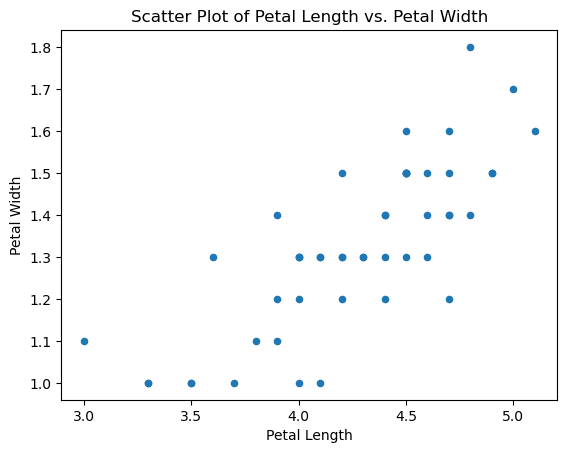

In [9]:
# Plotting the Dataframe named data having x axis as 'petal_length', y axis as 'petal_width' and kind='scatter'
data.plot(x='petal_length', y='petal_width', kind='scatter')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter Plot of Petal Length vs. Petal Width')
plt.show()

In [10]:
# We will now split the dataset into training and test datasets into (X_train,Y_train) and (X_test,Y_test)
from sklearn.model_selection import train_test_split
X=data['petal_length'].values.reshape(-1,1)
Y=data['petal_width'].values.reshape(-1,1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.33,random_state=1)


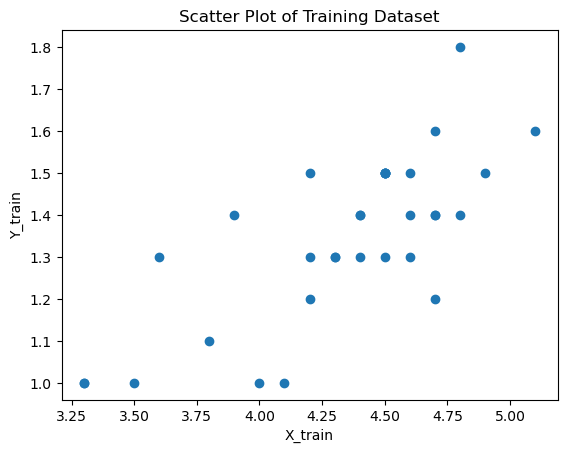

In [11]:
# Plotting training datasets
plt.scatter(X_train, Y_train)
plt.xlabel('X_train')
plt.ylabel('Y_train')
plt.title('Scatter Plot of Training Dataset')
plt.show()

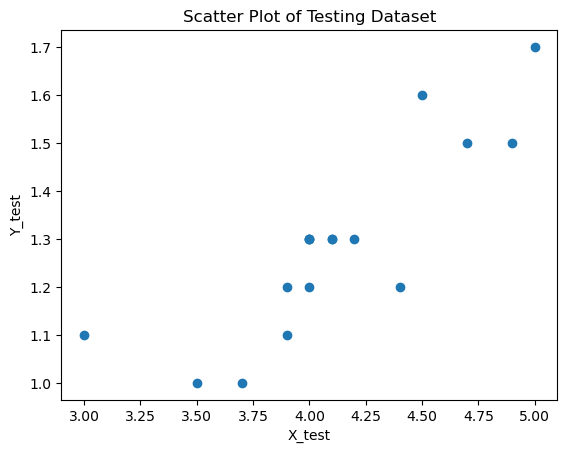

In [12]:
# Plotting test datasets
plt.scatter(X_test, Y_test)
plt.xlabel('X_test')
plt.ylabel('Y_test')
plt.title('Scatter Plot of Testing Dataset')
plt.show()

In [13]:
# LinearRegession using sklearn
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model using X_train and Y_train
model.fit(X_train, Y_train)

# Make predictions on the training data
Y_pred = model.predict(X_train)


In [14]:
# Printing the Intercept and Coefficient
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [-0.10228121]
Coefficients: [[0.3338594]]


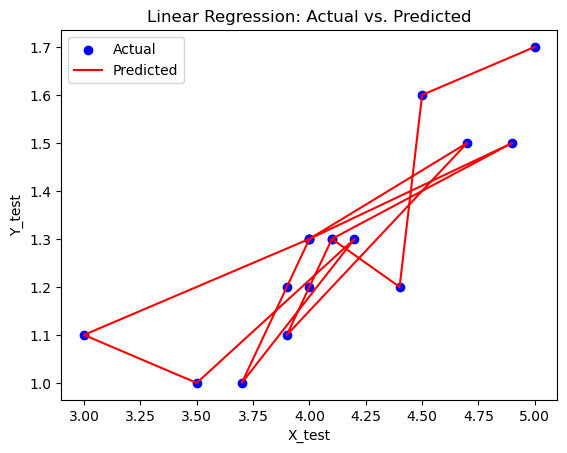

In [15]:
# Now we can overlay the predicted line and test data points to see where the predicted point lies.

# Create a scatter plot of the test data
plt.scatter(X_test, Y_test, color='blue', label='Actual')

# Plot the predicted line
plt.plot(X_test, Y_test, color='red', label='Predicted')

# Set labels and title
plt.xlabel('X_test')
plt.ylabel('Y_test')
plt.title('Linear Regression: Actual vs. Predicted')

# Add a legend
plt.legend()

# Display the plot
plt.show()
